In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/boston.csv')
df

,csvbase_row_id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.isnull().sum()

,0
csvbase_row_id,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   csvbase_row_id  506 non-null    int64  
 1   CRIM            506 non-null    float64
 2   ZN              506 non-null    float64
 3   INDUS           506 non-null    float64
 4   CHAS            506 non-null    int64  
 5   NOX             506 non-null    float64
 6   RM              506 non-null    float64
 7   AGE             506 non-null    float64
 8   DIS             506 non-null    float64
 9   RAD             506 non-null    int64  
 10  TAX             506 non-null    float64
 11  PTRATIO         506 non-null    float64
 12  B               506 non-null    float64
 13  LSTAT           506 non-null    float64
 14  MEDV            506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [ ]:
df.describe()

,csvbase_row_id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


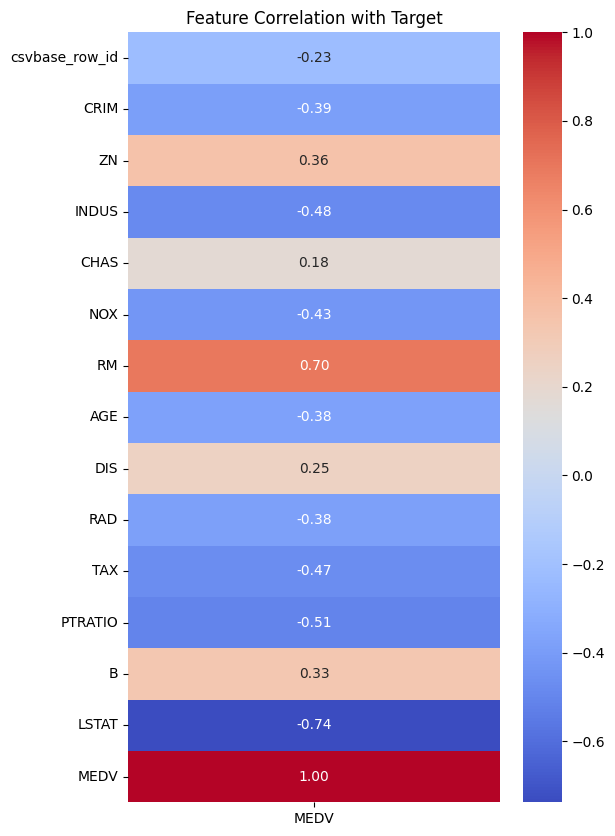

In [ ]:
corr_with_target = df.corr()[['MEDV']]


plt.figure(figsize=(6, 10))
sns.heatmap(
    corr_with_target,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True

)
plt.title("Feature Correlation with Target")
plt.show()


In [ ]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']

In [ ]:
X

,csvbase_row_id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


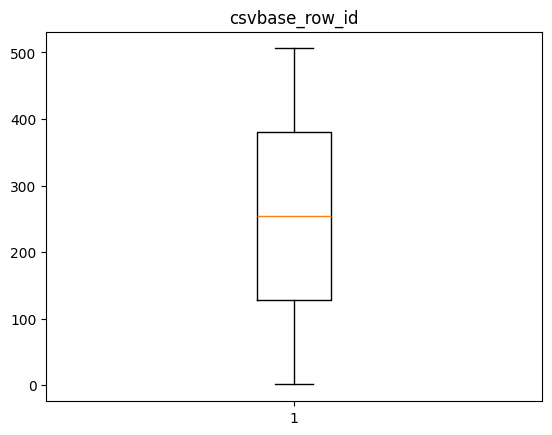

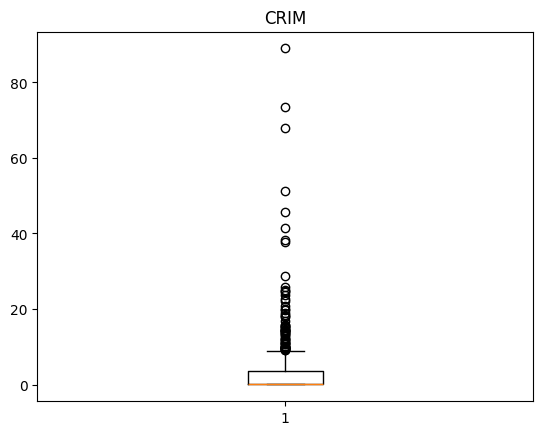

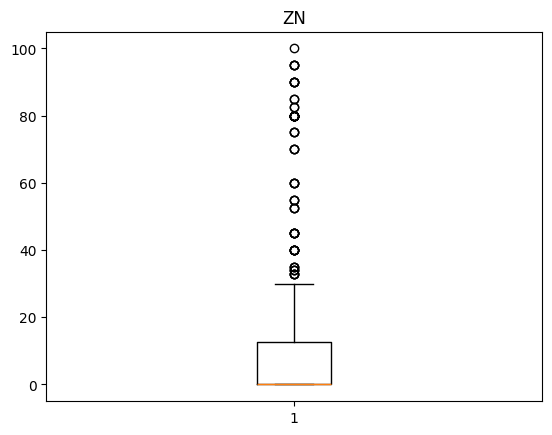

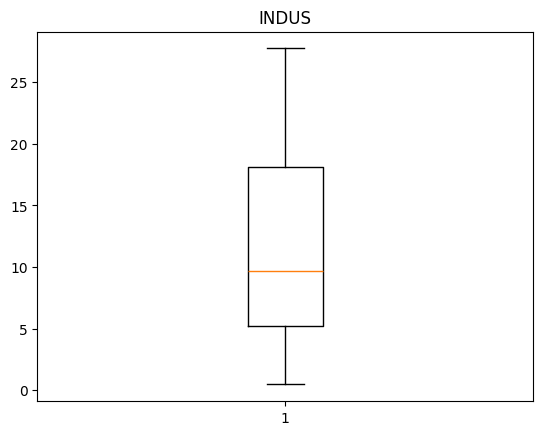

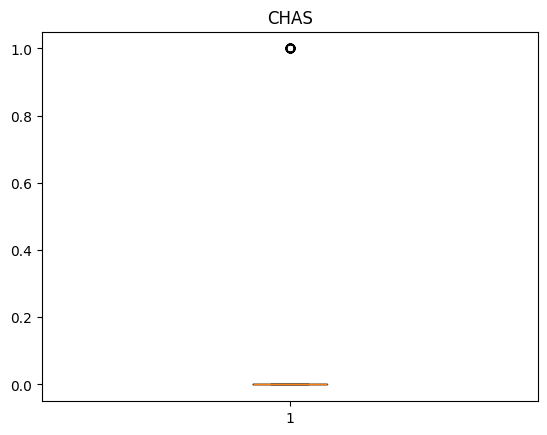

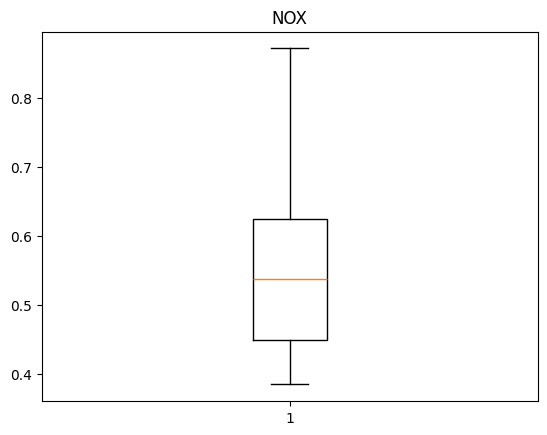

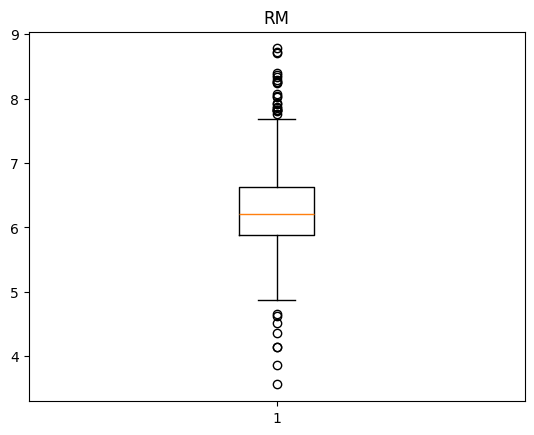

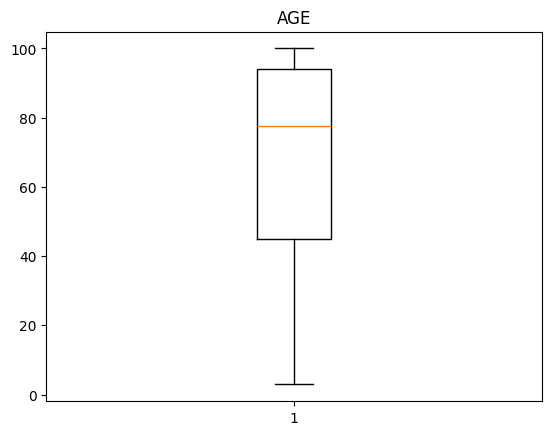

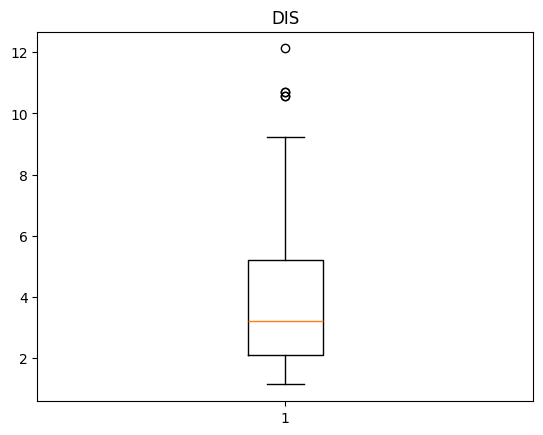

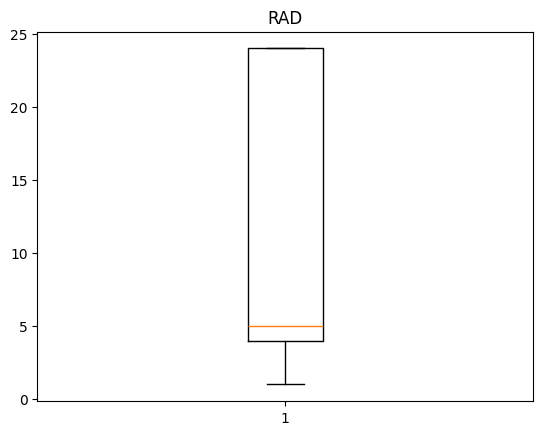

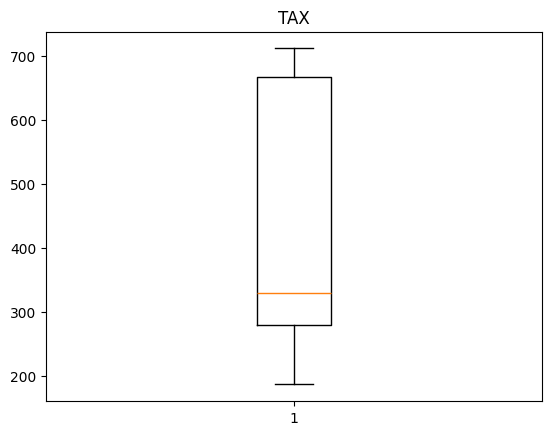

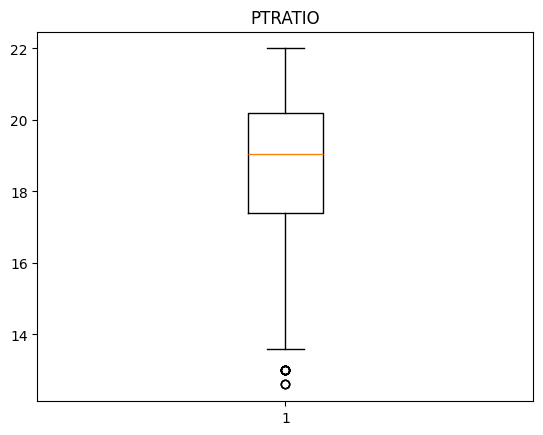

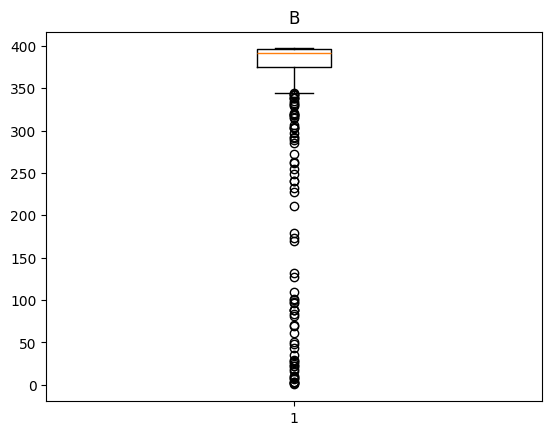

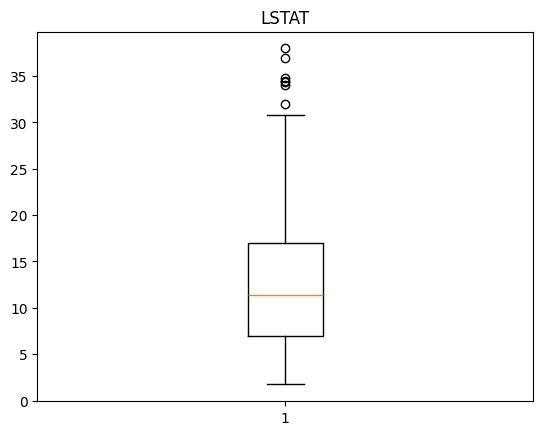

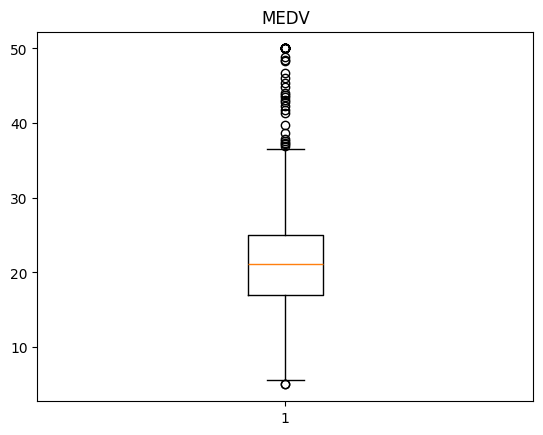

In [ ]:
for i in df.select_dtypes(exclude='object'):
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()


In [ ]:
le.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=le.predict(X_test)

In [ ]:
print(f"R2score : {r2_score(y_test,pred)}")


R2score : 0.6659408703343057


In [ ]:
df_copy=df  #Now remove outliers and recheck


In [ ]:
out=['CRIM','ZN','B']
for i in out:
  q1=df_copy[i].quantile(0.25)
  q3=df_copy[i].quantile(0.75)
  iqr=q3-q1
  ll=q1-1.5*iqr
  ul=q3+1.5*iqr
  df_copy[(df_copy[i]>ll) & (df_copy[i]<ul)]

In [ ]:
X_copy=df_copy.drop(columns=['MEDV'])
y_copy=df_copy['MEDV']

In [ ]:
X_copy_train,X_copy_test,y_copy_train,y_copy_test=train_test_split(X_copy,y_copy,test_size=0.2,random_state=42)

In [ ]:
le.fit(X_copy_train,y_copy_train)

LinearRegression()

In [ ]:
y_pred=le.predict(X_copy_test)

In [ ]:
print(f"R2score : {r2_score(y_test,y_pred)}")  # no difference before and after removing outliers

R2score : 0.6659408703343057


In [ ]:
from sklearn.ensemble import RandomForestRegressor   # Now try with RFG
model=RandomForestRegressor()

In [ ]:
model.fit(X_copy_train,y_copy_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(X_copy_test)

In [ ]:
print(f"R2score : {r2_score(y_copy_test,y_pred)}")

R2score : 0.9153472079504874


In [ ]:
from xgboost import XGBRegressor # Try with XGBoost Regressor

In [ ]:
model_1 = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)


In [ ]:
model_1.fit(X_copy_train, y_copy_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model_1.predict(X_copy_test)
print("MSE:", mean_squared_error(y_copy_test, y_pred))
print("R²:", r2_score(y_copy_test, y_pred))

MSE: 6.207909496074867
R²: 0.9153472079504874


Comapring all the models

In [ ]:
models = {
    "Linear Regression": le,
    "Random Forest": model,
    "XGBoost": model_1
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_copy_test)
    results[name] = {
        "predictions": y_pred,
        "R2": r2_score(y_copy_test, y_pred),
        "MSE": mean_squared_error(y_copy_test, y_pred),
        "MAE": mean_absolute_error(y_copy_test, y_pred)
    }

import pandas as pd
df_results = pd.DataFrame(results).T
print(df_results)


                                                         predictions  \
Linear Regression  [28.973353639142314, 35.87795794066229, 13.973...   
Random Forest      [24.242546, 31.078835, 16.416119, 24.183939, 1...   
XGBoost            [24.242546, 31.078835, 16.416119, 24.183939, 1...   

                         R2       MSE       MAE  
Linear Regression  0.665941  24.49782  3.200755  
Random Forest      0.915347  6.207909   1.89211  
XGBoost            0.915347  6.207909   1.89211  


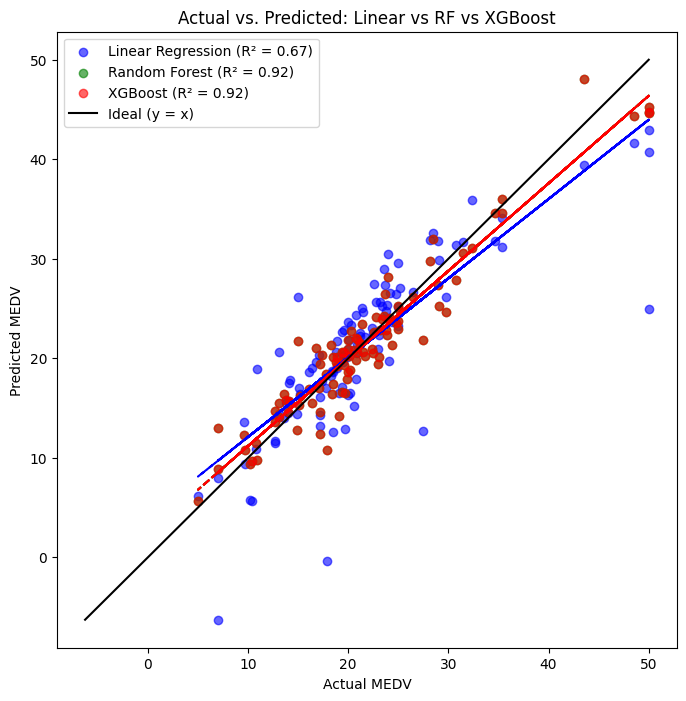

In [ ]:
plt.figure(figsize=(8, 8))
x = y_copy_test.values
colors = {"Linear Regression": "blue", "Random Forest": "green", "XGBoost": "red"}

for name, res in results.items():
    y_pred = res["predictions"]
    plt.scatter(x, y_pred, alpha=0.6, color=colors[name], label=f"{name} (R² = {res['R2']:.2f})")
    slope, intercept = np.polyfit(x, y_pred, 1)
    plt.plot(x, slope*x + intercept, linestyle='--', color=colors[name])

lims = [min(x.min(), min(res["predictions"].min() for res in results.values())),
        max(x.max(), max(res["predictions"].max() for res in results.values()))]
plt.plot(lims, lims, 'k-', label='Ideal (y = x)')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted: Linear vs RF vs XGBoost")
plt.legend()
plt.show()
